# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import RandomUnderSampler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_absolute_error
from sklearn.tree import plot_tree, DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

### 1. Load the dataset

In [19]:
# Load files into a pandas dataframe
train = pd.read_csv('data/Train.csv')


In [20]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)


train data shape : (23524, 13)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [21]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [30]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
bank_account              0
dtype: int64


We don't have missing data in our dataset.



In [23]:
selected_features = ['country', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type']

In [24]:
X = train[selected_features]
y = train['bank_account']

In [25]:
#smote = SMOTE(random_state=89)
#smote = SMOTENC(random_state=89, categorical_features=[0,1,2,5,6,7,8,9])
rus = RandomUnderSampler(random_state=1234)

#fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X,y) # Resample the dataset

print('original dataset shape', Counter(y))
print('resample dataset shape', Counter(y_rus))

original dataset shape Counter({'No': 20212, 'Yes': 3312})
resample dataset shape Counter({'No': 3312, 'Yes': 3312})


In [26]:
y_rus

20913     No
23484     No
3972      No
22641     No
12153     No
        ... 
23327    Yes
23331    Yes
23351    Yes
23358    Yes
23362    Yes
Name: bank_account, Length: 6624, dtype: object

In [27]:
#joined_df2 = pd.concat([quality_dummies, wine_df], axis=1)
#joined_df2.head()
train = pd.concat([X_rus, y_rus], axis='columns')
train

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
20913,Tanzania,Urban,No,2,75,Male,Head of Household,Single/Never Married,No formal education,Self employed,No
23484,Uganda,Urban,Yes,2,20,Female,Other relative,Single/Never Married,Primary education,No Income,No
3972,Kenya,Rural,No,2,26,Female,Spouse,Married/Living together,Primary education,Informally employed,No
22641,Uganda,Urban,No,2,26,Female,Spouse,Married/Living together,Primary education,Self employed,No
12153,Rwanda,Rural,Yes,4,16,Male,Child,Single/Never Married,Primary education,Self employed,No
...,...,...,...,...,...,...,...,...,...,...,...
23327,Uganda,Urban,Yes,1,24,Female,Head of Household,Single/Never Married,Secondary education,Other Income,Yes
23331,Uganda,Rural,Yes,3,26,Female,Head of Household,Married/Living together,Secondary education,Other Income,Yes
23351,Uganda,Rural,Yes,5,36,Female,Head of Household,Widowed,Primary education,No Income,Yes
23358,Uganda,Rural,Yes,10,50,Female,Head of Household,Widowed,Primary education,Self employed,Yes


In [28]:
train.columns

Index(['country', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type', 'bank_account'],
      dtype='object')

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_9713/2932368837.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


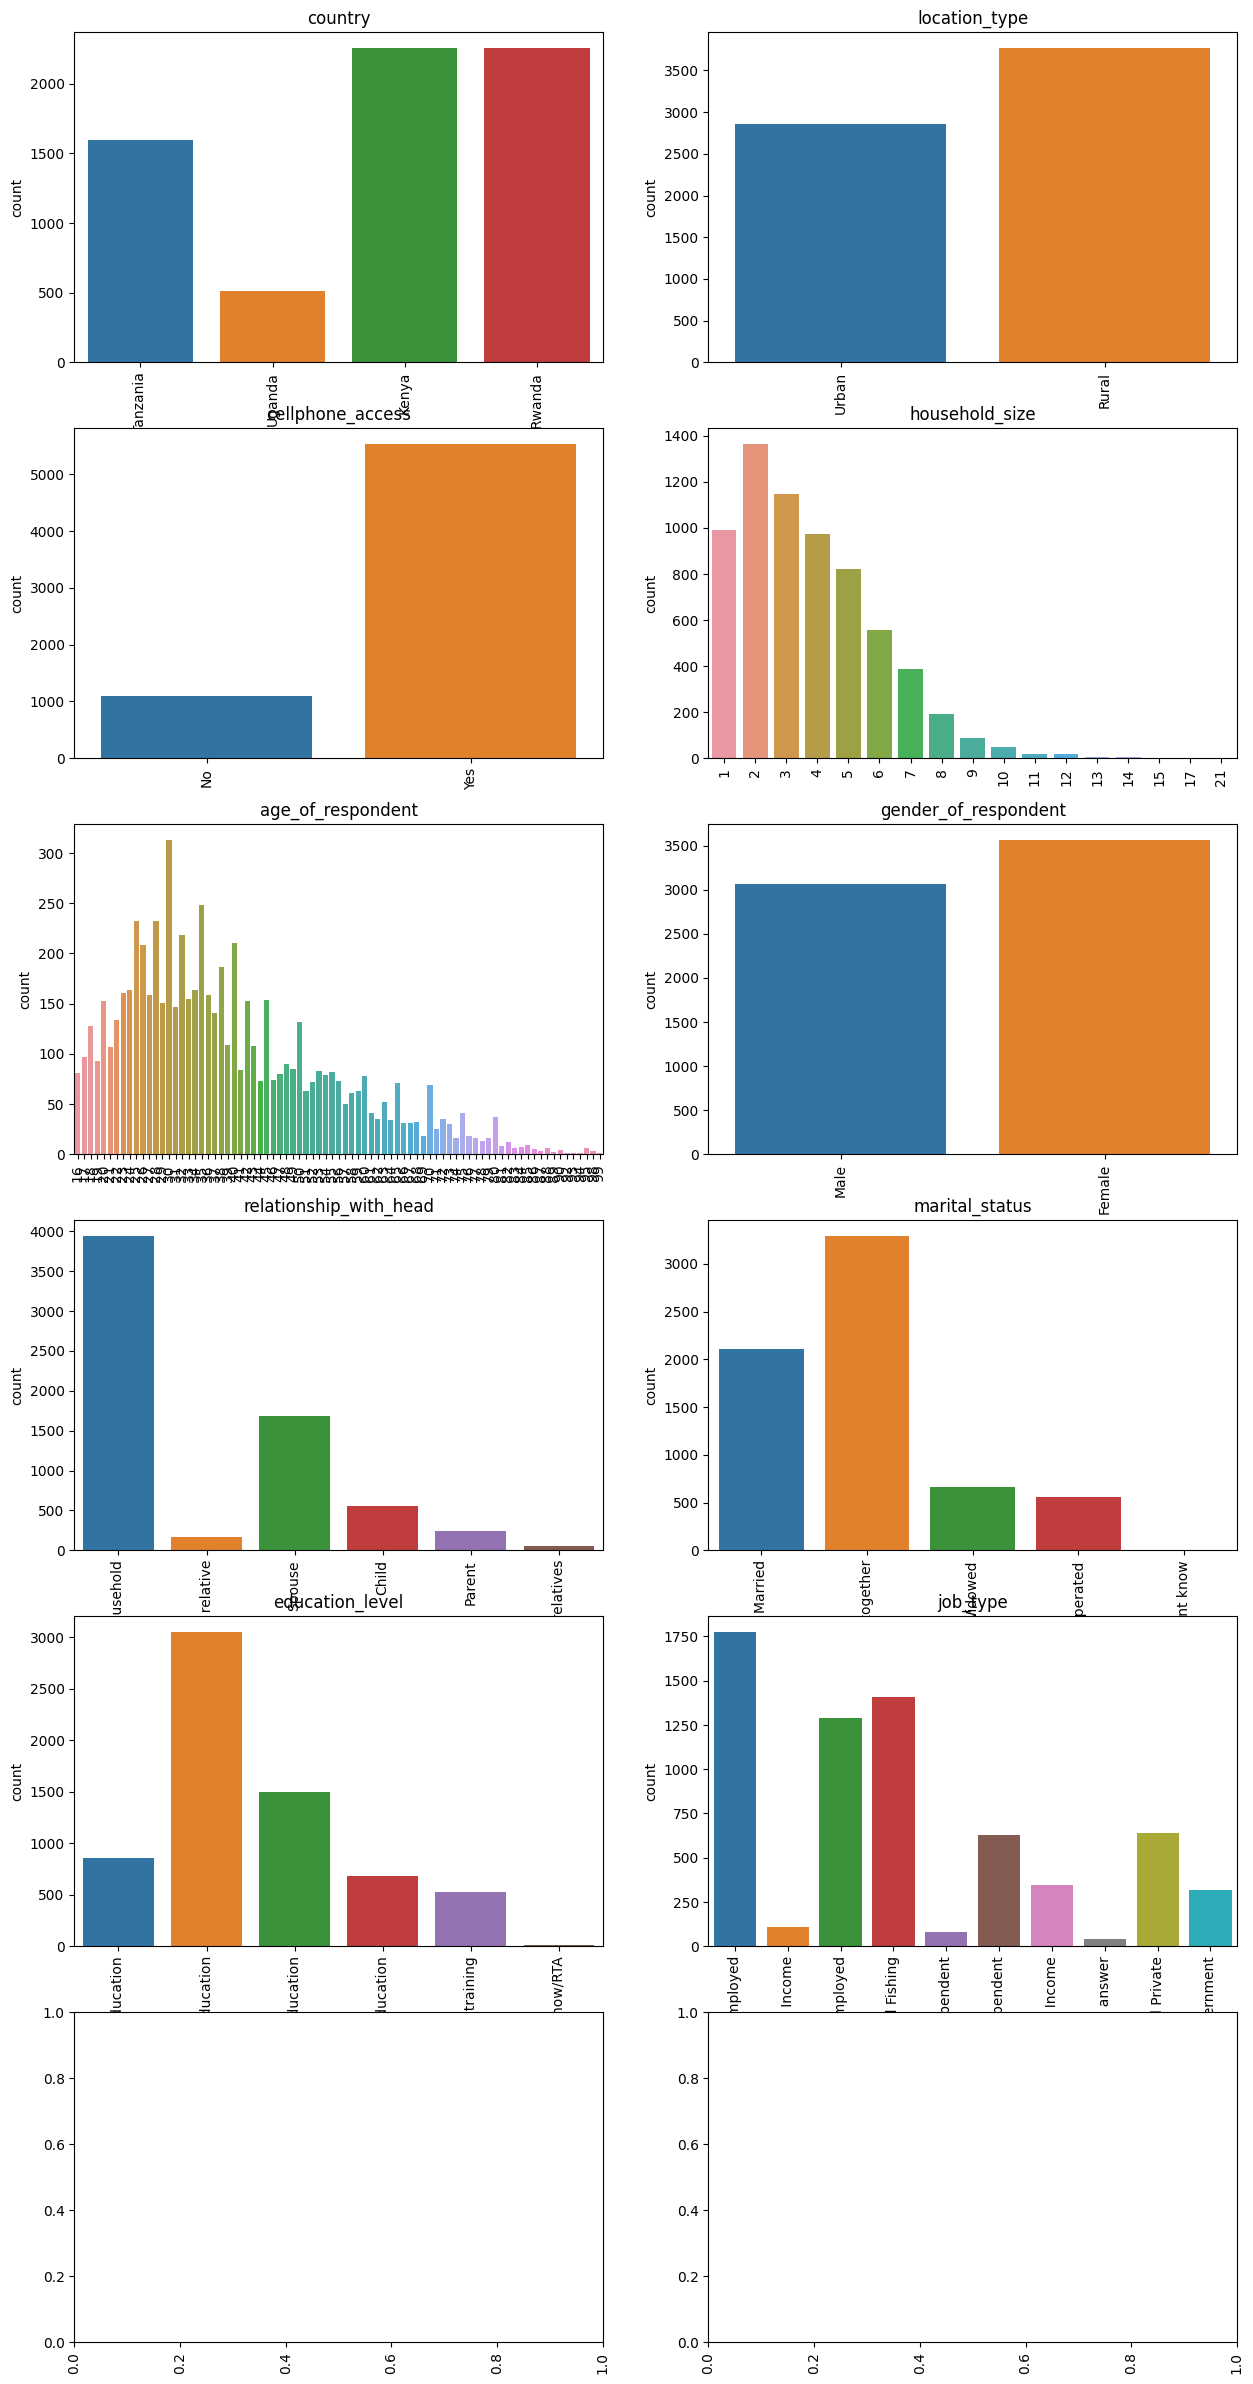

In [31]:
selected_columns = ['country', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type']
fig,ax = plt.subplots(6,2,figsize=(15,30))
count = 0
for item in selected_columns:
    sns.countplot(data=train, x=item, ax=ax[int(count/2)][count%2]).set(title=item, xlabel='')
    count += 1

for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)



In [32]:
train.bank_account.value_counts()

bank_account
No     3312
Yes    3312
Name: count, dtype: int64

In [33]:
train.country.value_counts(normalize=True)

country
Kenya       0.340580
Rwanda      0.340429
Tanzania    0.241395
Uganda      0.077597
Name: proportion, dtype: float64

In [34]:
train.country.value_counts()

country
Kenya       2256
Rwanda      2255
Tanzania    1599
Uganda       514
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

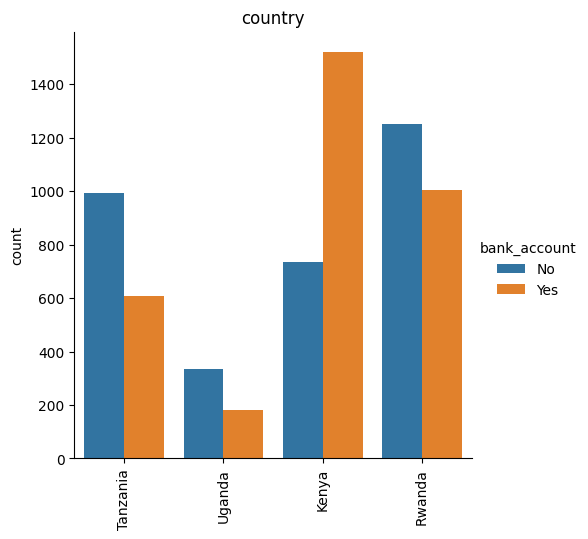

<Figure size 640x480 with 0 Axes>

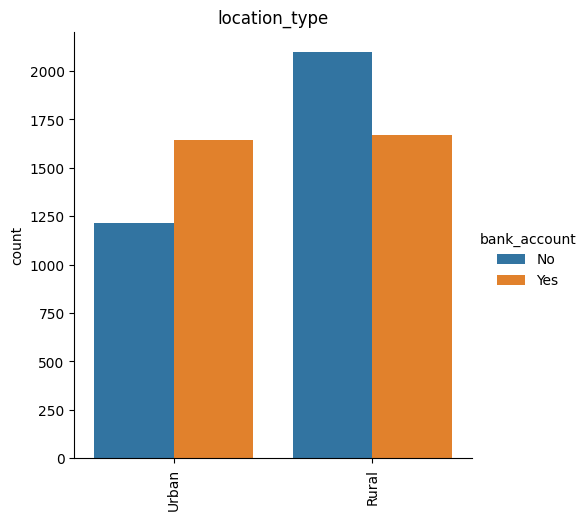

<Figure size 640x480 with 0 Axes>

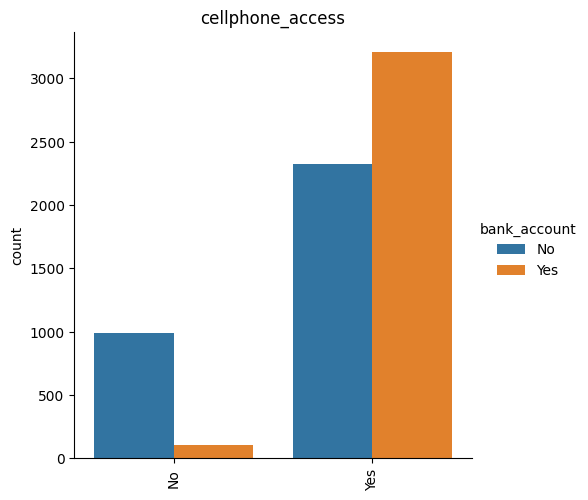

<Figure size 640x480 with 0 Axes>

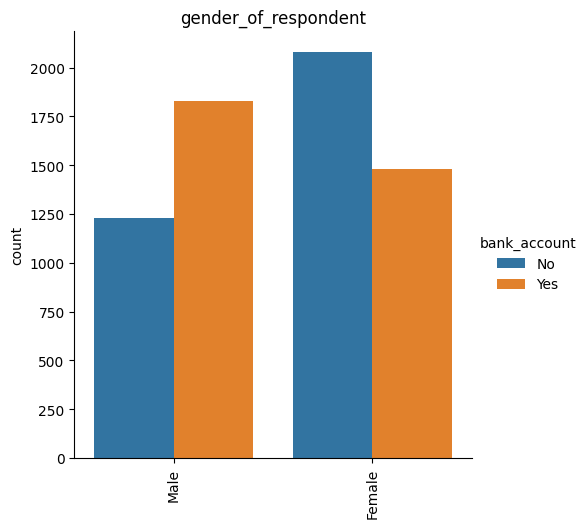

<Figure size 640x480 with 0 Axes>

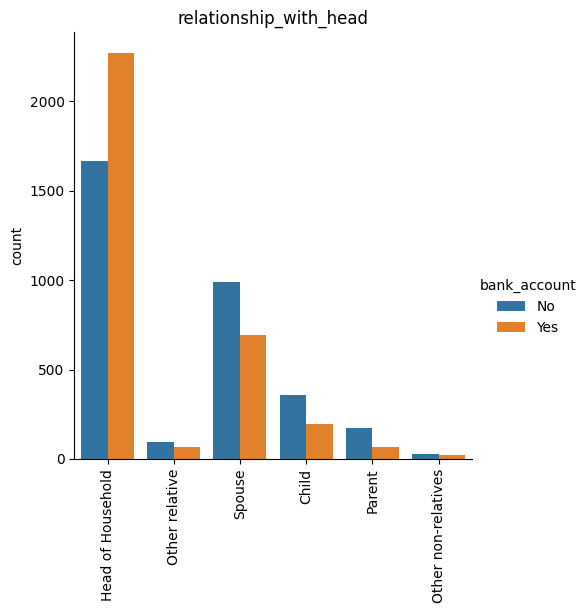

<Figure size 640x480 with 0 Axes>

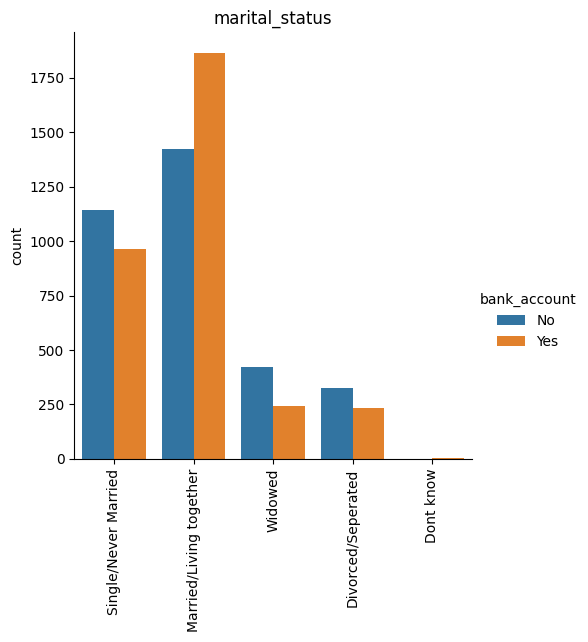

<Figure size 640x480 with 0 Axes>

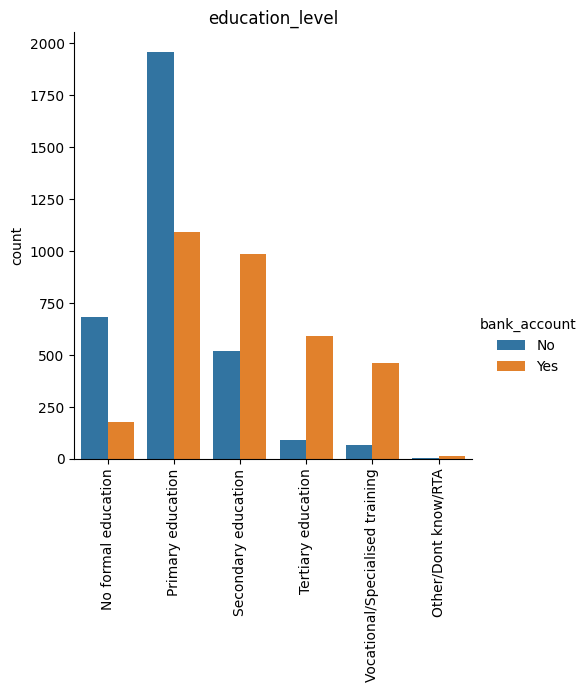

<Figure size 640x480 with 0 Axes>

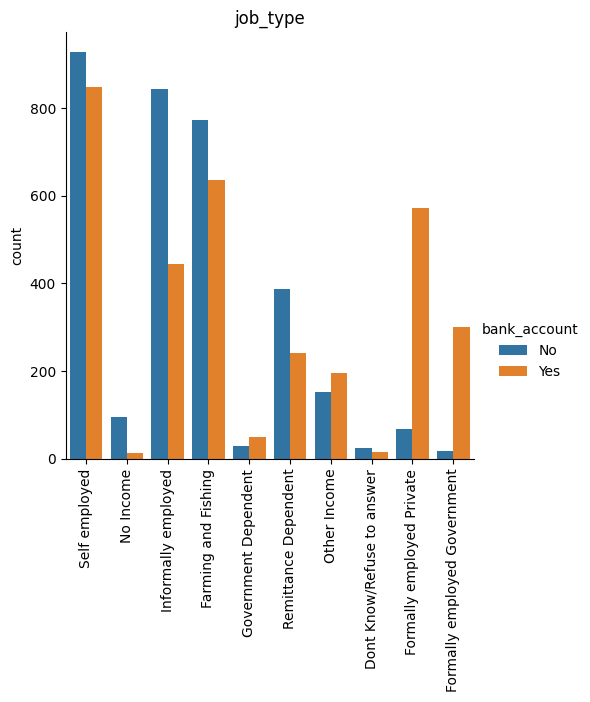

<Figure size 640x480 with 0 Axes>

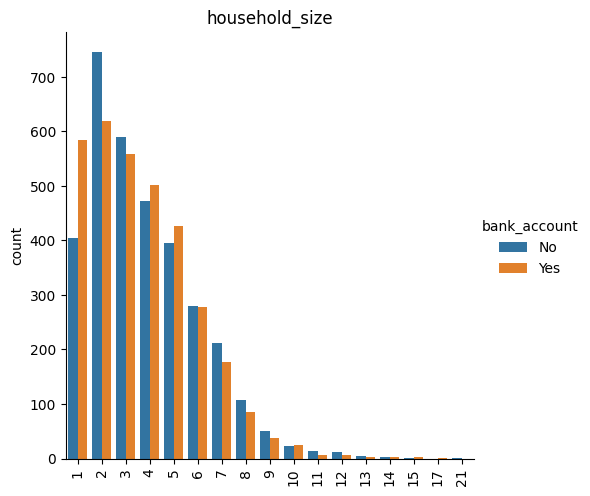

<Figure size 640x480 with 0 Axes>

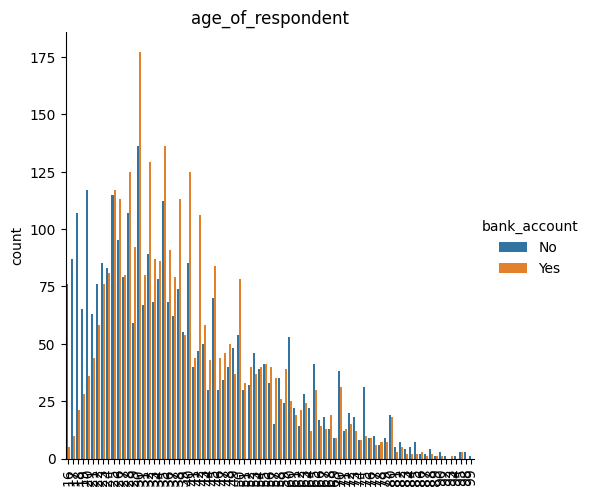

In [35]:
selected_columns = ['country', 'location_type',
                    'cellphone_access', 'gender_of_respondent', 
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type',
                    'household_size','age_of_respondent']
count = 0
for item in selected_columns:
    plt.figure()
    g=sns.catplot(data=train, x=item, hue = 'bank_account', kind='count').set(xlabel='', title = item)
    ax = g.facet_axis(0,0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show();
    count += 1
